In [52]:
import tensorflow as tf
from tensorflow import keras
import glob 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
train_img_path = glob.glob("/home/mi/zpz/xuexi/dc_2000/train/*/*.jpg")

In [54]:
len(train_img_path)

2000

In [55]:
train_img_path[:5]

['/home/mi/zpz/xuexi/dc_2000/train/dog/dog.186.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/dog/dog.281.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/dog/dog.223.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/dog/dog.408.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/dog/dog.557.jpg']

In [56]:
train_img_path[-5:]

['/home/mi/zpz/xuexi/dc_2000/train/cat/cat.433.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/cat/cat.796.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/cat/cat.173.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/cat/cat.355.jpg',
 '/home/mi/zpz/xuexi/dc_2000/train/cat/cat.458.jpg']

In [57]:
p ='/home/mi/zpz/xuexi/dc_2000/train/cat/cat.433.jpg'

In [58]:
int(p.split("/")[-2] == "cat")  #cat标签设置为1

1

In [59]:
train_img_label =[int(p.split("/")[-2] == "cat") for p in train_img_path]

In [60]:
train_img_label[-2]

1

In [61]:
def load_preprocess_image(path,label):  #读取解析图片    数据增强也在这处理
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[360,360])
    image = tf.image.random_crop(image,[256,256,3]) #随机裁减
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image) #随机上下翻转
    image = tf.image.random_brightness(image,0.5)#随机改变亮度
    image = tf.image.random_contrast(image,0,1)#随机改变高度
    image = tf.cast(image,tf.float32) #转换数据类型
    image = image/255
    label = tf.reshape(label,[1])#把列表标签转化为每个是列表格式
    return image,label

In [62]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_img_path,train_img_label)) #创建dataset

In [63]:
AUTOTUNE = tf.data.experimental.AUTOTUNE #根据 电脑判断是否进行并行运算

In [64]:
train_image_ds = train_image_ds.map(load_preprocess_image,num_parallel_calls=AUTOTUNE)

In [65]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

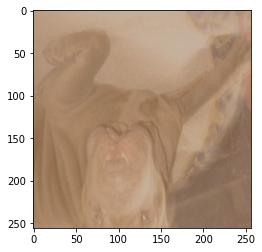

In [71]:
for img,label in train_image_ds.take(1):
    plt.imshow(img)

In [ ]:
test_image_path = glob.glob("/home/mi/zpz/xuexi/dc_2000/test/*/*.jpg")
test_img_label =[int(p.split("/")[-2] == "cat") for p in test_img_path]
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path,test_img_label))
test_image_ds = test_image_ds.map(load_preprocess_image,num_parallel_calls=AUTOTUNE)
test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.prefetch(AUTOTUNE) 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5271/958713919.py", line 2, in <module>
    test_img_label =[int(p.split("/")[-2] == "cat") for p in test_img_path]
NameError: name 'test_img_path' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    ret

In [51]:
len(test_image_path)

1004

In [16]:
BATCH_SIZE = 32
train_count = len(train_img_path)

In [17]:
train_image_ds = train_image_ds.shuffle(train_count).batch(BATCH_SIZE)

In [18]:
train_image_ds = train_image_ds.prefetch(AUTOTUNE) #后台提前读取数据

In [19]:
imgs,labels = next(iter(train_image_ds))

In [20]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [21]:
labels.shape

TensorShape([32, 1])

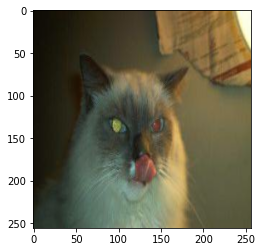

In [22]:
plt.imshow(imgs[0]) #第一张图片

In [23]:
labels[0]

<tf.Tensor: id=48, shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>

In [24]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(1024,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1)
    
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

In [26]:
pred = model(imgs)

2021-11-17 17:44:06.419093: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 528515072 exceeds 10% of system memory.
2021-11-17 17:44:06.623941: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 528515072 exceeds 10% of system memory.
2021-11-17 17:44:06.715713: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 528515072 exceeds 10% of system memory.


In [27]:
pred.shape

TensorShape([32, 1])

In [28]:
pred

<tf.Tensor: id=317, shape=(32, 1), dtype=float32, numpy=
array([[0.01008314],
       [0.01148124],
       [0.01205186],
       [0.0130266 ],
       [0.0118832 ],
       [0.01481252],
       [0.0102494 ],
       [0.01745321],
       [0.01094128],
       [0.01463801],
       [0.01347147],
       [0.00735258],
       [0.01015162],
       [0.01434694],
       [0.01396646],
       [0.01823577],
       [0.01566584],
       [0.014737  ],
       [0.01231811],
       [0.01220275],
       [0.01489875],
       [0.01369286],
       [0.01299015],
       [0.01223968],
       [0.01382136],
       [0.01063753],
       [0.00970135],
       [0.01528843],
       [0.00743408],
       [0.00814239],
       [0.01109028],
       [0.00999392]], dtype=float32)>

In [29]:
np.array([p[0].numpy() for p in tf.cast(pred>0,tf.int32)]) #取出大于0的值 更改类型为数值1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
labels

<tf.Tensor: id=40, shape=(32, 1), dtype=int32, numpy=
array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]], dtype=int32)>

In [31]:
np.array([l[0].numpy() for l in labels])

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [32]:
ls = tf.keras.losses.BinaryCrossentropy()

In [33]:
optimizer = tf.keras.optimizers.Adam()

In [37]:
epoch_loss_avg = tf.keras.metrics.Mean("train_loss")
train_accuracy = tf.keras.metrics.Accuracy()

epoch_loss_avg_test = tf.keras.metrics.Mean("test_loss")
test_accuracy = tf.keras.metrics.Accuracy()

In [44]:
def train_step(model,images,labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = tf.keras.losses.BinaryCrossentropy(from_logits = True)(labels,pred)
    grads = t.gradient(loss_step,model.trainable_variables)  #可执行参数
    optimizer.apply_gradients(zip(grads,model.trainable_variables)) #使用梯度进行优化
    epoch_loss_avg(loss_step)
    train_accuracy(labels,tf.cast(pred>0,tf.int32))

In [ ]:
def test_step(model,images,labels):
    pred = model(images,training=False)
    loss_step = tf.keras.losses.BinaryCrossentropy(from_logits = True)(labels,pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels,tf.cast(pred>0,tf.int32))

In [45]:
train_loss_results = []
train_acc_results = []

test_loss_results = []
test_acc_results = []

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [43]:
num_epochs = 30

In [ ]:
for epoch in range(num_epochs):
    for imgs_,labels_ in train_image_ds:
        train_step(model,imgs_,labels_)
        print(".",end="")  #每训练一个batch打印一个点
  
    print()  #训练一个epoch换一个行
    train_loss_results.append(epoch_loss_avg.result())
    train_acc_results.append(train_accuracy.result())
    
    for imgs_,labels_ in test_image_ds:
        test_step(model,imgs_,labels_)
    
    test_loss_results.append(epoch_loss_avg_test.result())
    test_acc_results.append(test_accuracy.result())
    
    
    print("Epoch:{}:loss:{:.3f},accuracy:{:.3f},test_loss:{:.3f},test_accuracy:{:.3f}".format(
        epoch+1,                                              
        epoch_loss_avg.result(),                                                
        train_accuracy.result(),
        epoch_loss_avg_test.result(),
        test_accuracy.result()
        
    ))
    epoch_loss_avg.reset_states() #重置为0
    train_accuracy.reset_states()
    

..............................................................

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



.Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5271/996211948.py", line 13, in <module>
    train_accuracy.result()
AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '3f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mi/zpz/anaconda3/envs/tf_2.0_gpu/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    